# Лабораторная работа № 1

Группа М8О-109СВ-24

Панкин Андрей Андреевич


В модификациях можно тоже нарисовать визуализацию сползания точки до экстремума - для этого есть все средства, но этого вроде не требуется.

---

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

---

# Рисуем #

In [132]:
def plot_function(function, true_optimum, found_optimum, name):
    x = np.linspace(-4.5, 4.5, 100)
    y = np.linspace(-4.5, 4.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    true_z = function(*true_optimum)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.3)
    ax.scatter(*true_optimum, true_z, color='red', s=10, label="Analytical Optimum")
    
    for i, opt in enumerate(found_optimum):
        z = function(*opt)
        ax.scatter(opt[0], opt[1], z, color='blue', s=10, label=f"Found Optimum {i+1}")
    
    ax.set_title(name)
    ax.set_xlabel('X')
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    ax.legend()
    
    plt.show()

In [133]:
def calculate_error(analytical_solution, numerical_solution):
    absolute_error = np.linalg.norm(numerical_solution - analytical_solution)  # Просто ошибка в стандартном понимании R2
    relative_error = absolute_error / (np.linalg.norm(analytical_solution) + 1e-10)  # Абсолютная ошибка делится на норму аналитического решения, чтобы оценить ошибку в процентах относительно масштаба + пара копеек для стабильности
    return {"absolute_error": absolute_error, "relative_error": relative_error}

---


# Функция трёхгорбого верблюда #

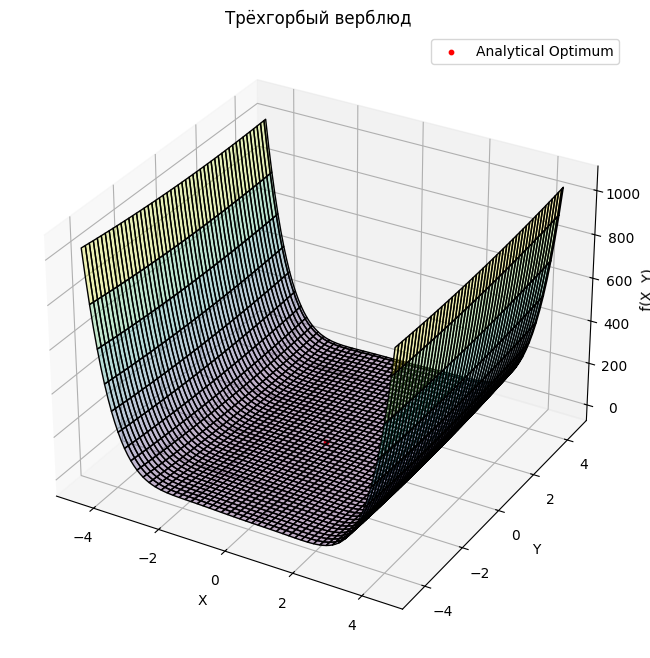

In [134]:
def camel_func(x, y):
    return 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2

def grad_camel_func(x, y):
    dx = 4 * x - 4.2 * x**3 + x**5 + y
    dy = x + 2 * y
    return np.array([dx, dy])

camel_min = [0, 0]

plot_function(camel_func, camel_min, [], 'Трёхгорбый верблюд')

# Функция МакКормика # 

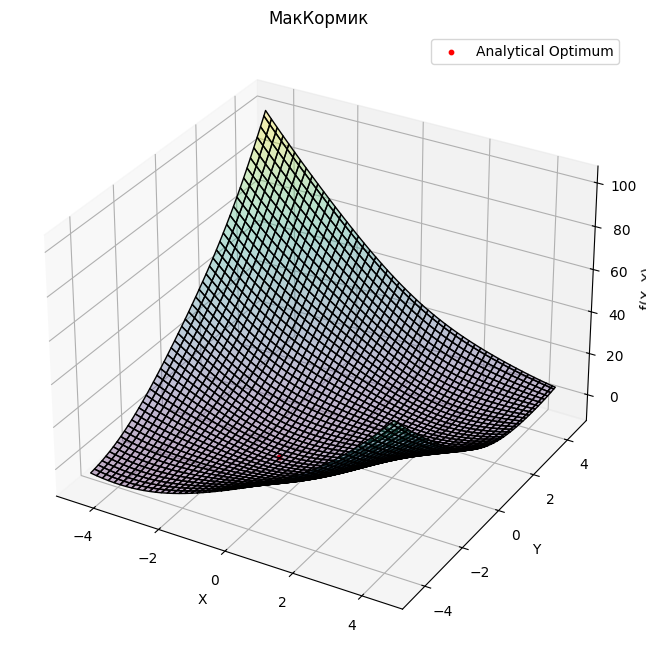

In [135]:
def mccormic_func(x, y):
    return np.sin(x + y) + (x - y)**2 - 1.5 * x + 2.5 * y + 1

def grad_mccormic_func(x, y):
    dx = np.cos(x + y) + 2 * x - 2 * y - 1.5
    dy = np.cos(x + y) - 2 * x + 2 * y + 2.5
    return np.array([dx, dy])

mccormic_min = [-0.54719, -1.54719]

plot_function(mccormic_func, mccormic_min, [], 'МакКормик')

---

# Собственная реализация градиентного спуска #

In [136]:
def gradient_descent(grad, start_point, learning_rate=0.001, iterations=1000000):
    point = np.array(start_point, dtype='float64')
    for _ in range(iterations):
        gradient = grad(point[0], point[1])
        point = point - learning_rate * gradient
    return point

Запуск первый:

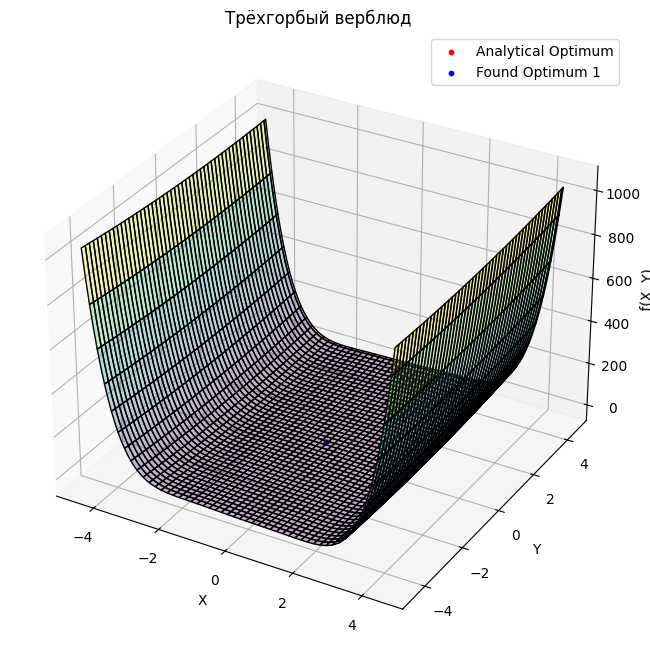

The extremum point is [-1.05e-321  1.76e-321]
Absolute error: 0.000000
Relative error: 0.000000


In [137]:
point = gradient_descent(grad_camel_func, [1.,1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"The extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

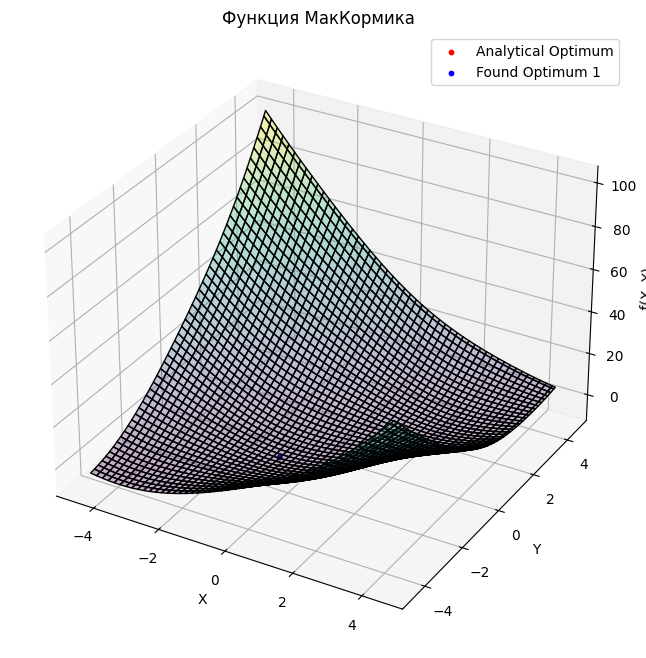

Found extremum point is [-0.54719755 -1.54719755]
Absolute error: 0.000011
Relative error: 0.000007


In [138]:
point = gradient_descent(grad_mccormic_func, [1.,1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

Запуск второй:

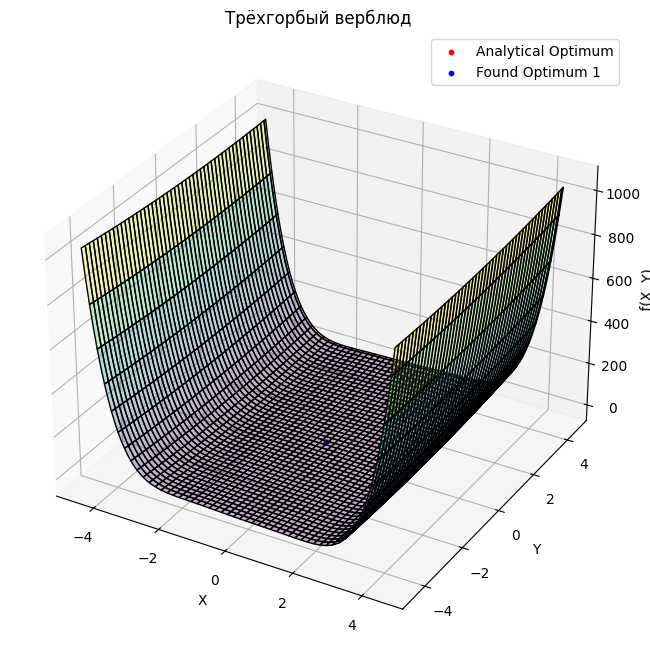

Found extremum point is [ 1.05e-321 -1.76e-321]
Absolute error: 0.000000
Relative error: 0.000000


In [139]:
point = gradient_descent(grad_camel_func, [-1.,-1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"Found extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

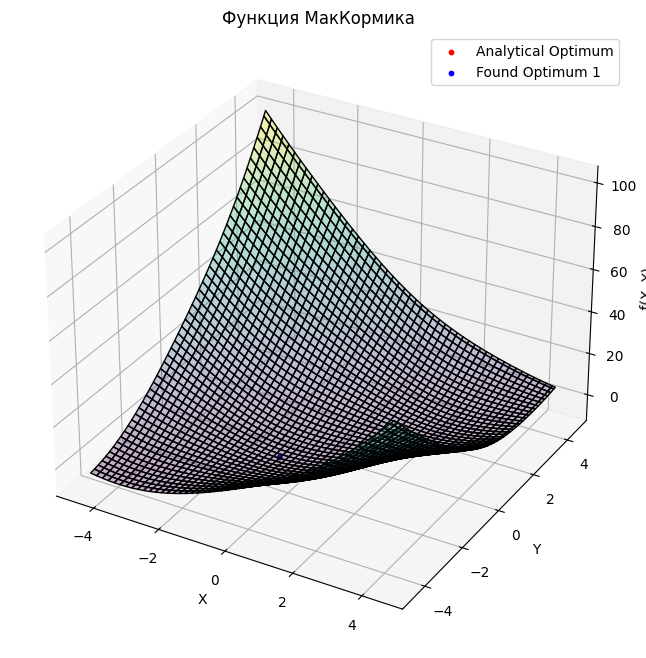

Found extremum point is [-0.54719755 -1.54719755]
Absolute error: 0.000011
Relative error: 0.000007


In [140]:
point = gradient_descent(grad_mccormic_func, [-1.,-1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

---

# Нарисуем траекторию #

In [141]:
def plot_function_with_trajectory(function, true_optimum, trajectory, name):
    x = np.linspace(-4.5, 4.5, 100)
    y = np.linspace(-4.5, 4.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    true_z = function(*true_optimum)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.3)
    
    ax.scatter(*true_optimum, true_z, color='red', s=30, label="Analytical Optimum")
    
    for i, (x, y) in enumerate(trajectory):
        z = function(x, y)
        ax.scatter(x, y, z, color='blue', s=3)
        if i > 0:
            ax.plot(
                [trajectory[i-1][0], x],
                [trajectory[i-1][1], y],
                [function(*trajectory[i-1]), z],
                color='orange',
                linewidth=1.5,
                alpha=0.8,
            )
    
    ax.set_title(name)
    ax.set_xlabel('X')
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    ax.legend()
    plt.show()

In [142]:
def gradient_descent_with_trajectory(grad, start_point, learning_rate=0.001, iterations=1000):
    point = np.array(start_point, dtype='float64')
    trajectory = [point.copy()]  # Храним траекторию точек
    for _ in range(iterations):
        gradient = grad(point[0], point[1])
        point = point - learning_rate * gradient
        trajectory.append(point.copy())  # Добавляем текущую точку в траекторию
    return point, trajectory

Запуск первый:

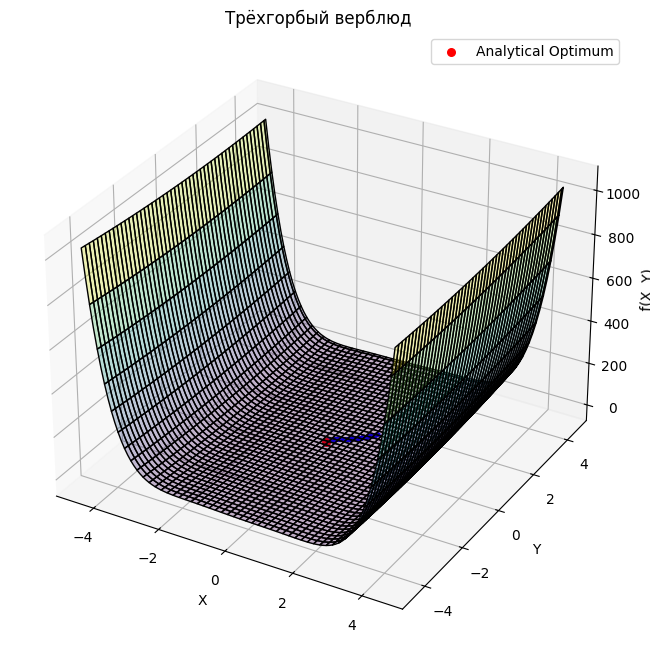

The extremum point is [-0.00376921  0.07289914]
Absolute error: 0.072997
Relative error: 729965208.711209


In [143]:
final_point, camel_trajectory = gradient_descent_with_trajectory(grad_camel_func, [1., 1.])

plot_function_with_trajectory(camel_func, camel_min, camel_trajectory, 'Трёхгорбый верблюд')

print(f"The extremum point is {final_point}")

errors = calculate_error(camel_min, final_point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

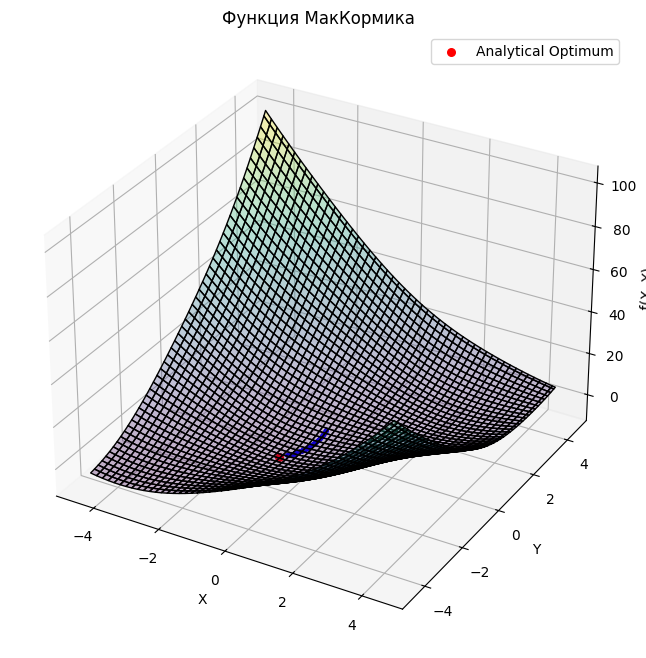

The extremum point is [-0.38999617 -1.37182686]
Absolute error: 0.235504
Relative error: 0.143504


In [144]:
final_point, mccormic_trajectory = gradient_descent_with_trajectory(grad_mccormic_func, [0., 0.])

plot_function_with_trajectory(mccormic_func, mccormic_min, mccormic_trajectory, 'Функция МакКормика')

print(f"The extremum point is {final_point}")

errors = calculate_error(mccormic_min, final_point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

Запуск второй:

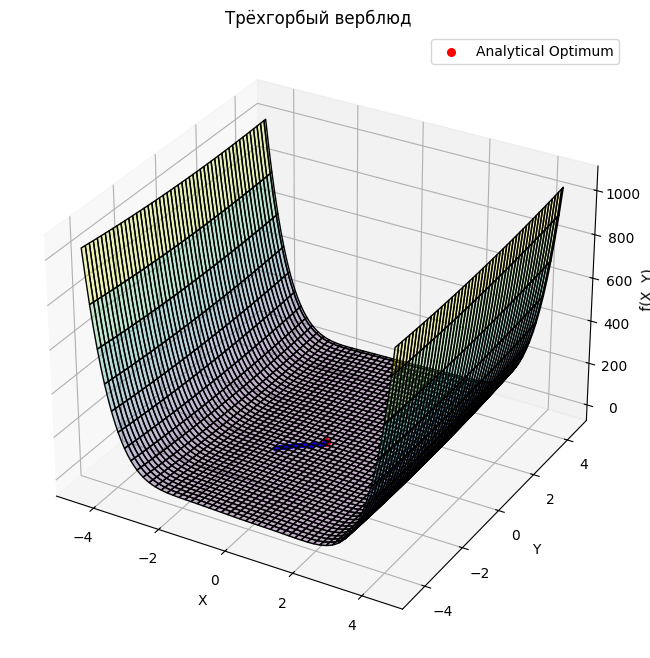

The extremum point is [ 0.00376921 -0.07289914]
Absolute error: 0.072997
Relative error: 729965208.711209


In [145]:
final_point, camel_trajectory = gradient_descent_with_trajectory(grad_camel_func, [-1., -1.])

plot_function_with_trajectory(camel_func, camel_min, camel_trajectory, 'Трёхгорбый верблюд')

print(f"The extremum point is {final_point}")

errors = calculate_error(camel_min, final_point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

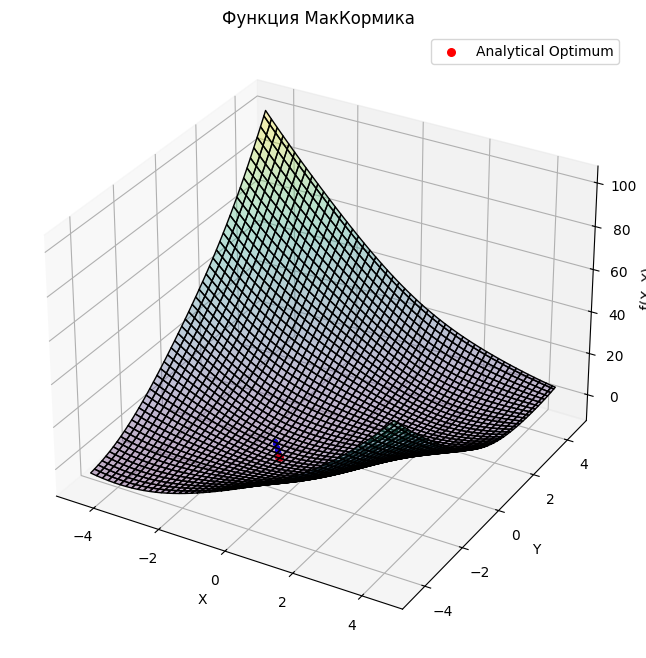

The extremum point is [-0.548122   -1.52995269]
Absolute error: 0.017262
Relative error: 0.010519


In [146]:
final_point, mccormic_trajectory = gradient_descent_with_trajectory(grad_mccormic_func, [-1., -1.])

plot_function_with_trajectory(mccormic_func, mccormic_min, mccormic_trajectory, 'Функция МакКормика')

print(f"The extremum point is {final_point}")

errors = calculate_error(mccormic_min, final_point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

---


# Моментная модификация градиентного спуска #

In [147]:
def gradient_descent_moment(grad, start_point, learning_rate=0.001, iterations=1000000, momentum=0.6):
    point = np.array(start_point, dtype='float64')
    speed = np.zeros_like(point)
    for _ in range(iterations):
        gradient = grad(point[0], point[1])
        point = point + momentum * speed - learning_rate * gradient
    return point

Запуск первый

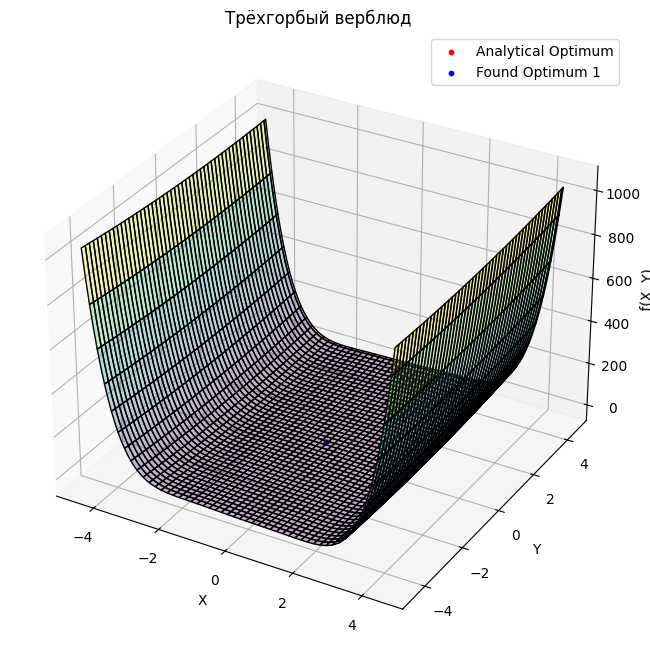

The extremum point is [-1.05e-321  1.76e-321]
The extremum point is [-1.05e-321  1.76e-321]
Absolute error: 0.000000
Relative error: 0.000000


In [148]:
point = gradient_descent_moment(grad_camel_func, [1.,1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"The extremum point is {point}")
print(f"The extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

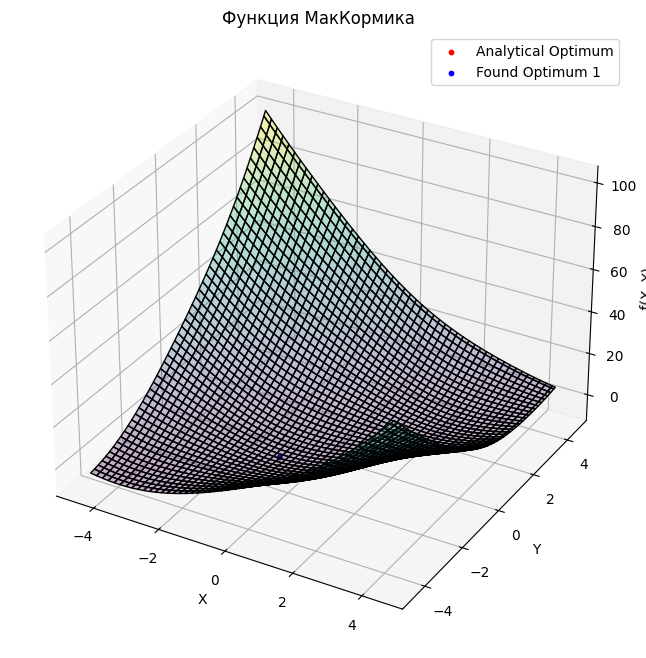

Found extremum point is [-0.54719755 -1.54719755]
Absolute error: 0.000011
Relative error: 0.000007


In [149]:
point = gradient_descent_moment(grad_mccormic_func, [1.,1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

Запуск второй

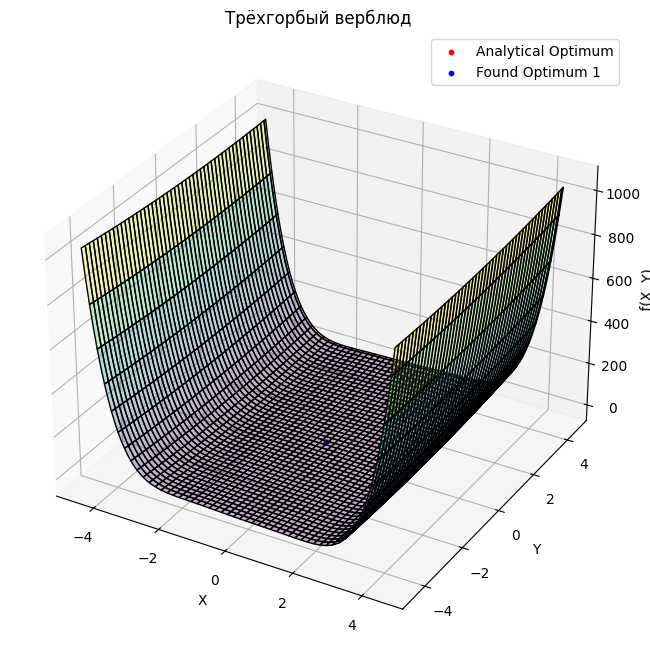

Found extremum point is [ 1.05e-321 -1.76e-321]
Absolute error: 0.000000
Relative error: 0.000000


In [150]:
point = gradient_descent(grad_camel_func, [-1.,-1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"Found extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

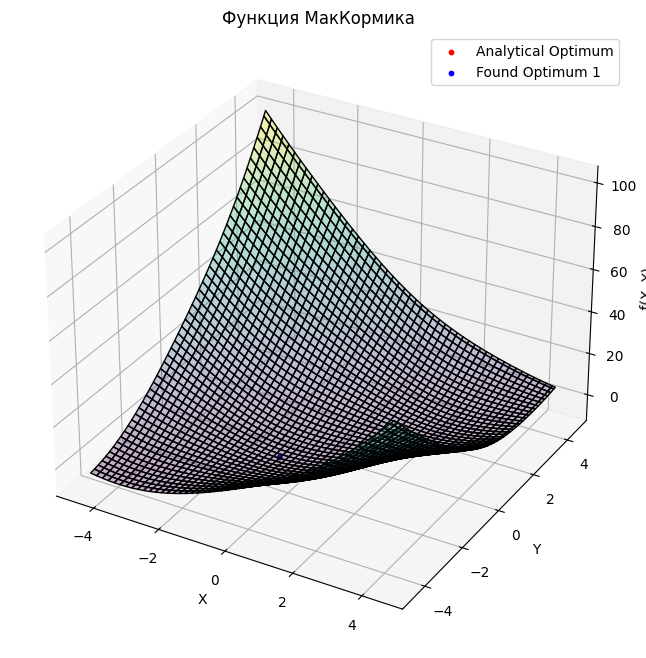

Found extremum point is [-0.54719755 -1.54719755]
Absolute error: 0.000011
Relative error: 0.000007


In [151]:
point = gradient_descent(grad_mccormic_func, [-1.,-1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

---

# Адаптивная модификация градиентного спуска # 

In [152]:
def gradient_descent_adaptive(grad, start_point, learning_rate=0.001, iterations=1000000, epsilon=1e-8):
    point = np.array(start_point, dtype='float64')
    gradient_square_accum = np.zeros_like(point)
    
    for _ in range(iterations):
        gradient = grad(point[0], point[1])
        gradient_square_accum += gradient**2
        point = point - learning_rate * ( gradient / (np.sqrt(gradient_square_accum) + epsilon) )
    
    return point

Запуск первый

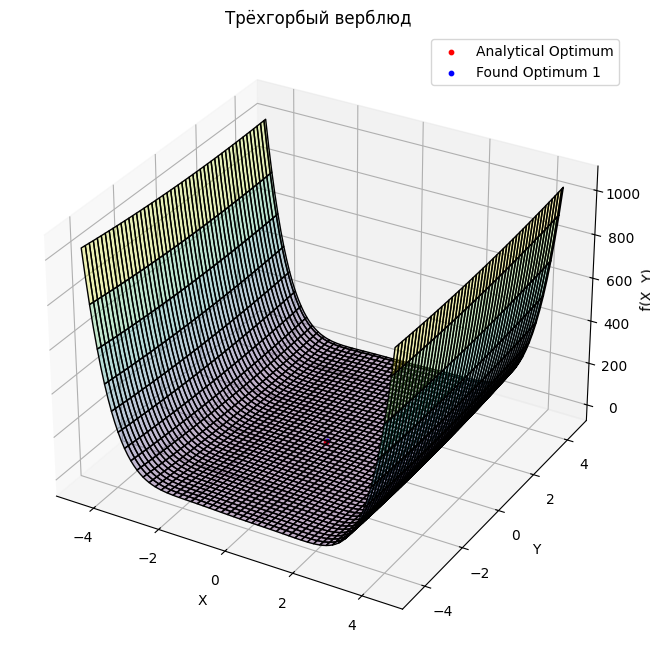

The extremum point is [-0.00932876  0.02971749]
The extremum point is [-0.00932876  0.02971749]
Absolute error: 0.031147
Relative error: 311473151.065838


In [153]:
point = gradient_descent_adaptive(grad_camel_func, [1.,1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"The extremum point is {point}")
print(f"The extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

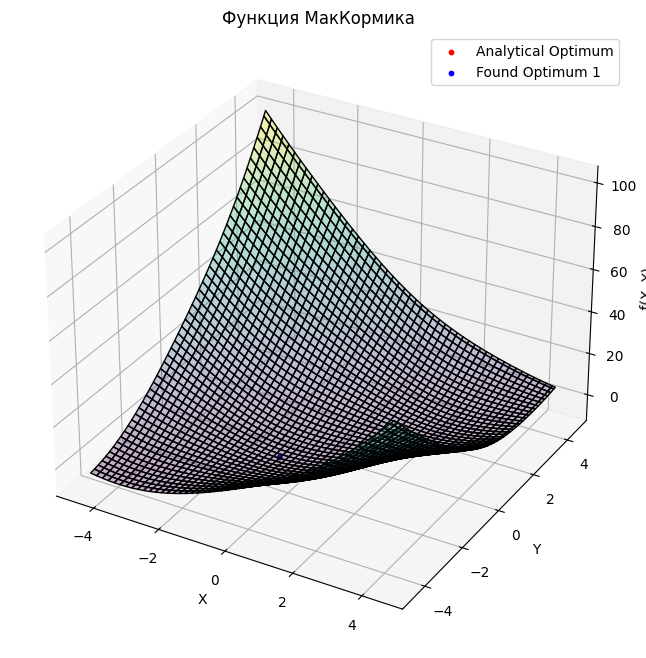

Found extremum point is [-0.54719755 -1.54719755]
Absolute error: 0.000011
Relative error: 0.000007


In [154]:
point = gradient_descent_moment(grad_mccormic_func, [1.,1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

Запуск второй 

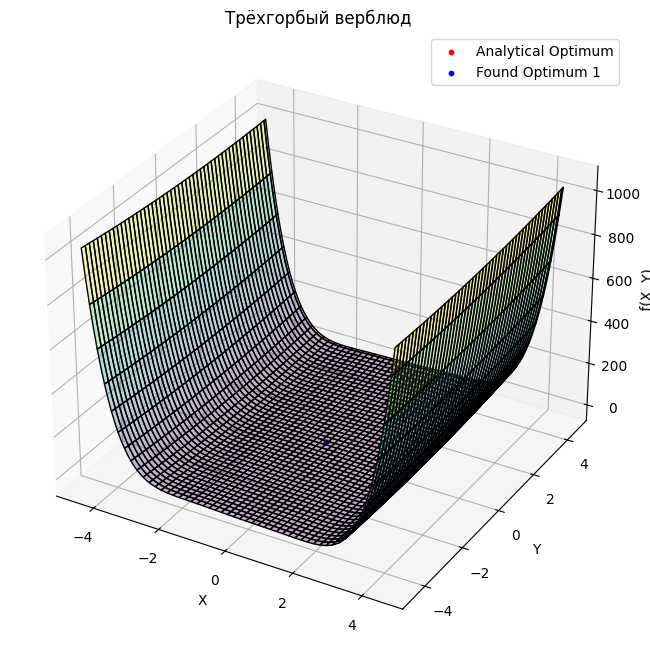

The extremum point is [ 0.00932876 -0.02971749]
The extremum point is [ 0.00932876 -0.02971749]
Absolute error: 0.031147
Relative error: 311473151.065838


In [155]:
point = gradient_descent_adaptive(grad_camel_func, [-1.,-1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"The extremum point is {point}")
print(f"The extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

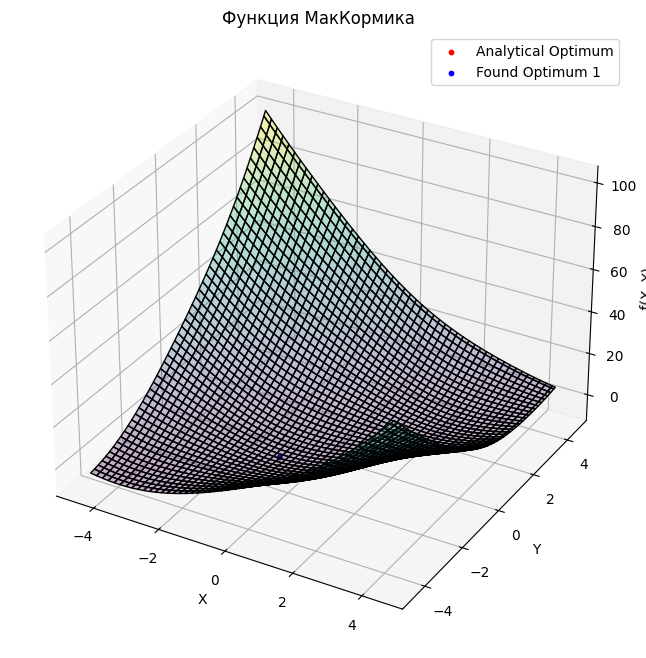

Found extremum point is [-0.54719755 -1.54719755]
Absolute error: 0.000011
Relative error: 0.000007


In [156]:
point = gradient_descent_moment(grad_mccormic_func, [-1.,-1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

---

# Метод эволюции темпа обучения #

In [157]:
def gradient_descent_lowering(grad, start_point, initial_learning_rate=0.001, decay_rate=0.1, iterations=1000000):
    point = np.array(start_point, dtype='float64')
    for t in range(1, iterations + 1):
        gradient = grad(point[0], point[1])
        learning_rate = initial_learning_rate / (1 + decay_rate * t)
        point = point - learning_rate * gradient
    return point

Запуск первый:

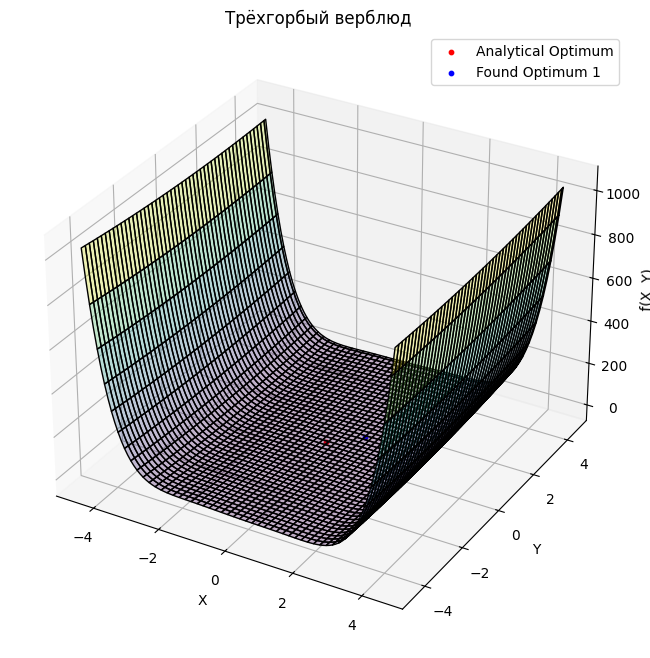

The extremum point is [0.77242063 0.70440172]
Absolute error: 1.045378
Relative error: 10453781174.858009


In [158]:
point = gradient_descent_lowering(grad_camel_func, [1.,1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"The extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

In [159]:
point = gradient_descent_lowering(grad_mccormic_func, [1.,1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

Found extremum point is [1.17323362 0.80538463]
Absolute error: 2.914527
Relative error: 1.775958


Запуск второй:

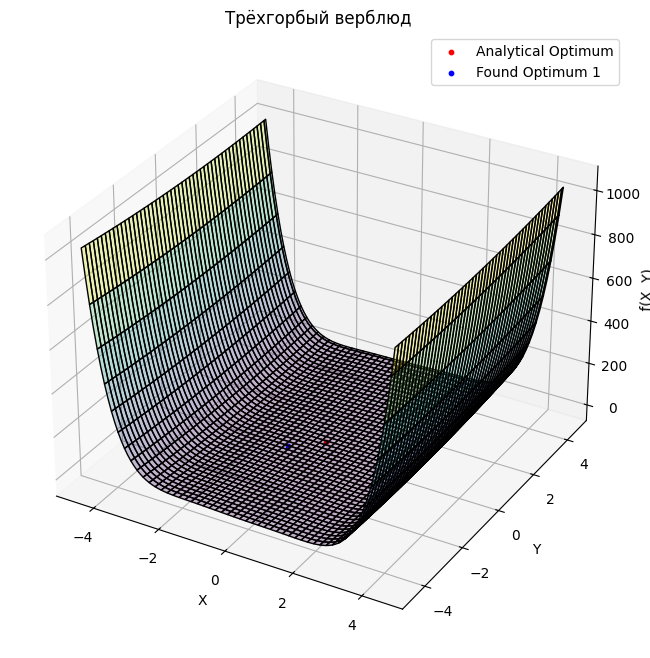

Found extremum point is [-0.77242063 -0.70440172]
Absolute error: 1.045378
Relative error: 10453781174.858009


In [160]:
point = gradient_descent_lowering(grad_camel_func, [-1.,-1.])

plot_function(camel_func, camel_min, [point], 'Трёхгорбый верблюд')
print(f"Found extremum point is {point}")

errors = calculate_error(camel_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

In [161]:
point = gradient_descent_lowering(grad_mccormic_func, [-1.,-1.])

plot_function(mccormic_func, mccormic_min, [point], 'Функция МакКормика')
print(f"Found extremum point is {point}")

errors = calculate_error(mccormic_min, point)
print(f"Absolute error: {errors['absolute_error']:.6f}")
print(f"Relative error: {errors['relative_error']:.6f}")

Found extremum point is [-0.82475537 -1.19260435]
Absolute error: 0.450304
Relative error: 0.274391


---

# Символьное вычисление градиента с помощью SymPy #

In [162]:
import sympy as sp

def symbolic_gradient(func, variables):
    gradient = [sp.diff(func, var) for var in variables]
    return gradient

x, y = sp.symbols('x y')
func = 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2  # Функция трёхгорбого верблюда
grad = symbolic_gradient(func, [x, y])
print("Gradient:", grad)

Gradient: [x**5 - 4.2*x**3 + 4*x + y, x + 2*y]


---

Выводы: